In [1]:
import sys
sys.path.append("aux/modules")
import cf_data, cf_plot, cf_radar

### The original Dataset

In [2]:
pdDataset = cf_data.getRawData()
pdDataset.head()

,riskiness,losses,manufacturer,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


### Creating a subset of the original Dataset

In [3]:
pdSubset = cf_data.getLimitedData()
pdSubset.head()

,manufacturer,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192


### Getting all manufacturer names

In [4]:
cf_data.getAllManufacturers()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

### Getting all occurrences of each manufacturer

In [5]:
(manufacturerNames, manufacturerCounts) = cf_data.getManufacturerCount(pdSubset); manufacturerCounts

[('audi', 4),
 ('bmw', 4),
 ('chevrolet', 3),
 ('dodge', 8),
 ('honda', 13),
 ('jaguar', 1),
 ('mazda', 11),
 ('mercedes-benz', 5),
 ('mitsubishi', 10),
 ('nissan', 18),
 ('peugot', 7),
 ('plymouth', 6),
 ('porsche', 1),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 31),
 ('volkswagen', 8),
 ('volvo', 11)]

### Getting the total occurrences of manufacturers with more than 6 occurrences each one

In [6]:
pdMajorManufacturers = cf_data.getLimitedData(lower_bound = 6)
len(pdMajorManufacturers.index)

141

### Normalizing the Dataset - Columns

In [7]:
pdNormalized = pdMajorManufacturers.copy()

In [8]:
pdNormalized.rename(
    columns = {
        'city mpg': 'mpg_city',
        'highway mpg': 'mpg_highway',
        'horsepower': 'horse_power'
    }, 
    inplace = True
)

In [9]:
pdNormalized.head()

,manufacturer,price,mpg_city,mpg_highway,horse_power,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148


### Normalizing the Dataset - Values

In [10]:
cf_data.normalizeColumns(['mpg_city', 'mpg_highway', 'horse_power'], pdNormalized); pdNormalized.head()

,manufacturer,price,mpg_city,mpg_highway,horse_power,weight,riskiness,losses
11,dodge,5572,0.62500,0.59375,0.108108,1876,1,118
12,dodge,6377,0.43750,0.50000,0.108108,1876,1,118
13,dodge,7957,0.21875,0.25000,0.337838,2128,1,118
14,dodge,6229,0.43750,0.50000,0.108108,1967,1,148
15,dodge,6692,0.43750,0.50000,0.108108,1989,1,148


In [11]:
cf_data.normalizeColumnsInverted(['price', 'weight', 'riskiness', 'losses'], pdNormalized); pdNormalized.head()

,manufacturer,price,mpg_city,mpg_highway,horse_power,weight,riskiness,losses
11,dodge,0.974068,0.62500,0.59375,0.108108,0.897031,0.4,0.722513
12,dodge,0.928086,0.43750,0.50000,0.108108,0.897031,0.4,0.722513
13,dodge,0.837836,0.21875,0.25000,0.337838,0.737840,0.4,0.722513
14,dodge,0.936540,0.43750,0.50000,0.108108,0.839545,0.4,0.565445
15,dodge,0.910093,0.43750,0.50000,0.108108,0.825648,0.4,0.565445


### Plotting

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('aux/mpl-styles/dark.mplstyle')

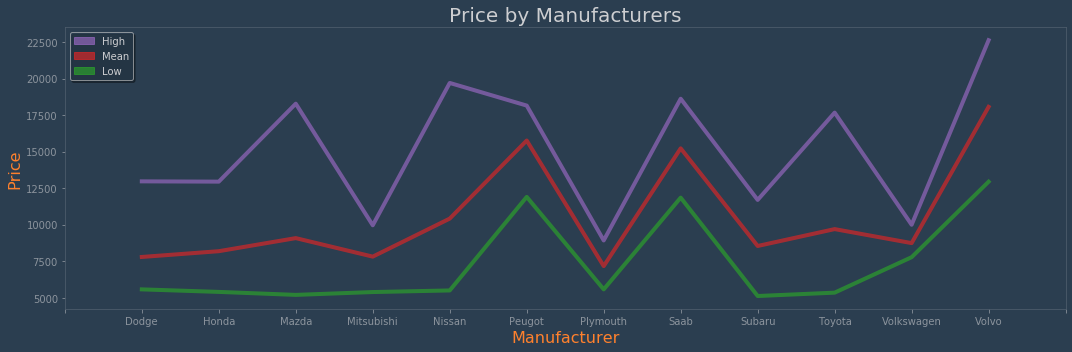

In [13]:
figure = plt.figure(figsize = (15, 5))
gridSpec = mpl.gridspec.GridSpec(1, 1)
axes = cf_plot.priceByManufacturer(figure, gridSpec, pdMajorManufacturers)

plt.show()

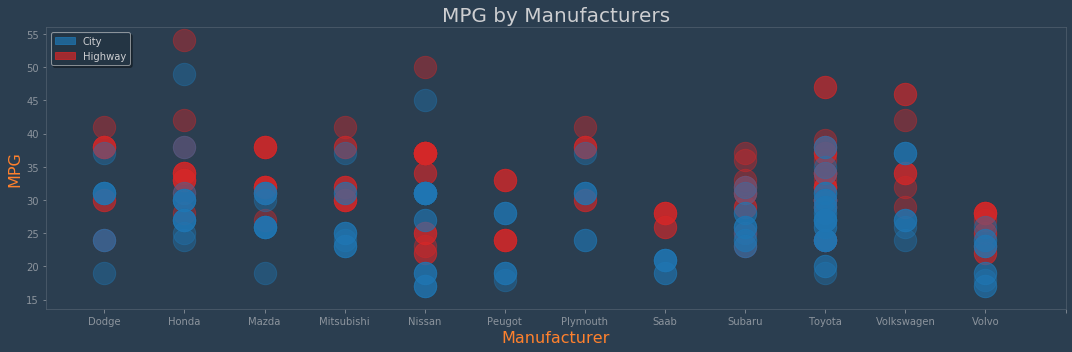

In [14]:
figure = plt.figure(figsize = (15, 5))
gridSpec = mpl.gridspec.GridSpec(1, 1)
axes = cf_plot.mpgByManufacturer(figure, gridSpec, pdMajorManufacturers)

plt.show()

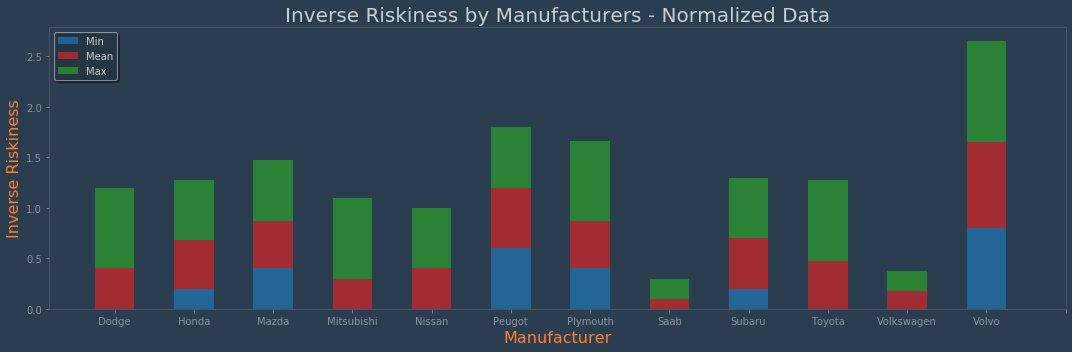

In [15]:
figure = plt.figure(figsize = (15, 5))
gridSpec = mpl.gridspec.GridSpec(1, 1)
axes = cf_plot.inverseRiskinessByManufacturer(figure, gridSpec, pdNormalized)

plt.show()

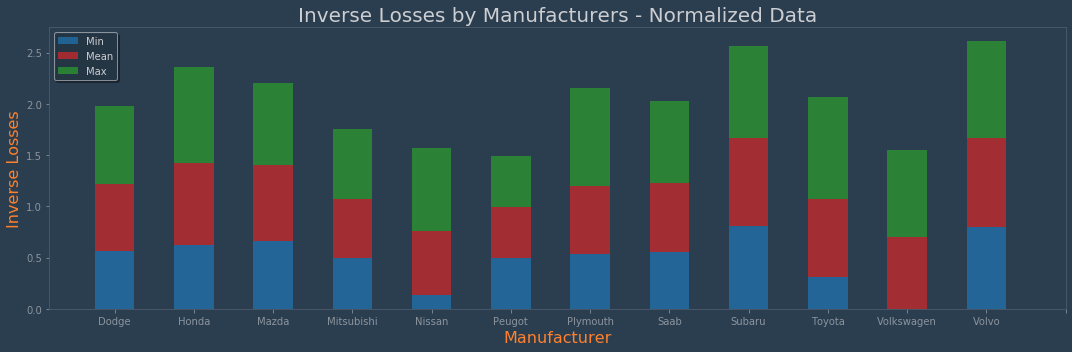

In [16]:
figure = plt.figure(figsize = (15, 5))
gridSpec = mpl.gridspec.GridSpec(1, 1)
axes = cf_plot.inverseLossesByManufacturer(figure, gridSpec, pdNormalized)

plt.show()

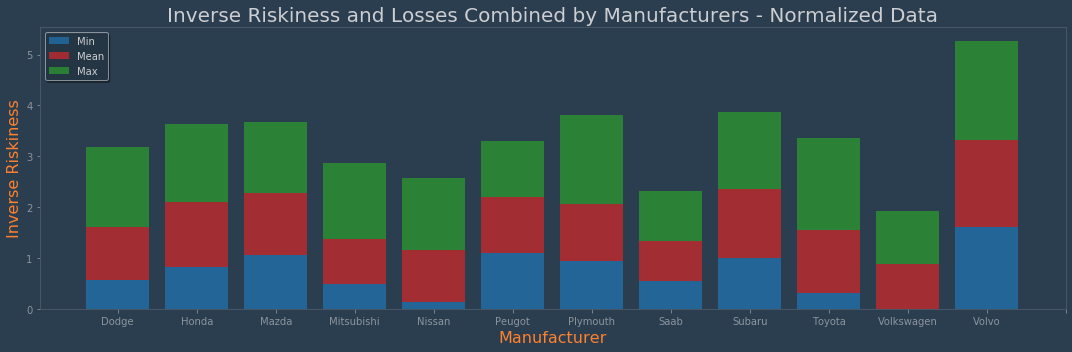

In [17]:
figure = plt.figure(figsize = (15, 5))
gridSpec = mpl.gridspec.GridSpec(1, 1)
axes = cf_plot.inverseRiskinessAndLossesCombinedByManufacturer(figure, gridSpec, pdNormalized)

plt.show()